# Otoczka wypukła

In [1]:
import numpy
from bitalg.tests.test2 import Test
from bitalg.visualizer.main import Visualizer

### Wprowadzenie

Czym jest otoczka wypukła?  
Podzbiór płaszczyzny $Q$ nazywamy wypukłym , gdy dla dowolnej pary punktów $p, q \in Q$ odcinek $\overline{pq}$ jest całkowicie zawarty w $Q$.  
Otoczka wypukła $\mathcal{CH}(Q)$ zbioru $Q$ jest najmniejszym wypukłym zbiorem zawierającym $Q$.

### Zastosowania otoczku wypukłej

Otoczki wypukłe - w szczególności otoczki wypukłe w przestrzeni trójwymiarowej - są spotykane w różnych zastosowaniach. Na przykład używa się ich do przyspieszania wykrywania kolizji w animacji komputerowej. Przepuśćmy, że chcemy sprawdzić, czy dwa obiekty $\mathcal{P_1}$ i $\mathcal{P_2}$ przecinają się. Jeśli przez większość czasu odpowiedź na to pytanie jest negatywna, to opłaca się następująca strategia. Przybliżamy obiekty przez prostrze obiekty $\widehat{\mathcal{P_1}}$ i $\widehat{\mathcal{P_2}}$, które zawierały orginały. Jeśli chcemy sprwadzić, czy $\mathcal{P_1}$ i $\mathcal{P_2}$ przecinają się, najpierw sprawdzamy, czy przecinają się $\widehat{\mathcal{P_1}}$ i $\widehat{\mathcal{P_2}}$. Jeśli występuje ten przypadek, to powinniśmy wykonać test na orginalnych obiektach, który jest przepuszczalnie znacznie kosztowniejszy.  
Sprawdzanie przecięcia otoczek wypukłych jest bardziej skomplikowane niż dla sfer - choć mimo to łatwiejsze niż dla obiektów niewypukłych - ale otoczki wypukłe mogą dużo lepiej przybliżać większość obiektów.

## Generowanie losowych punktów na płaszczyźnie 

Generowanie n punktów z zakresu (left,right)

In [2]:
def generate_uniform_points(left=-100, right=100, n=100):
    """
    Funkcja generuje równomiernie n punktów na kwadwratowym
    obszarze od left do right (jednakowo na osi y)
    o współrzędnych rzeczywistych
    :param left: lewy kraniec przedziału
    :param right: prawy kraniec przedziału
    :param n: ilość generowanych punktów
    :return: tablica punktów w postaci krotek współrzędnych
             np. [(x1, y1), (x2, y2), ... (xn, yn)]
    """
    punkty = []
    for _ in range(n):
        punkty.append([numpy.random.uniform(left,right), numpy.random.uniform(left,right)])
    return punkty

In [3]:
points_a = generate_uniform_points(-100, 100, 100)

Wizualizacja Zbioru A

In [ ]:
# visualize(points_a)
vis = Visualizer()
vis.add_point(points_a)
vis.show()

Generowanie n punktów na okręgu o środku w O i promieniu R

In [7]:
def generate_circle_points(O=(0,0), R=10, n=100):
    """
    Funkcja generuje jednostajnie n punktów na okręgu o środku O i promieniu R
    :param O: krotka współrzędnych x, y określająca środek okręgu
    :param R: promień okręgu
    :param n: ilość generowanych punktów
    :return: tablica punktów w postaci krotek współrzędnych
    """
    punkty = []
    for _ in range(n):
        kąt = numpy.random.uniform(0,2*numpy.pi) # generowanie kąta
        punkty.append((R * numpy.cos(kąt) + O[0],
                 R * numpy.sin(kąt) + O[1]))
    return punkty

In [8]:
points_b = generate_circle_points((0, 0), 10, 100)

Wizualizacja Zbioru B

In [ ]:
# visualize(points_b)
vis.clear()
vis.add_point(points_b)
vis.show()

Generowanie n punktów na bokach prostokąta o wierzchołkach: a, b, c i d.

In [9]:
def generate_rectangle_points(a=(-10, -10), b=(10, -10), c=(10, 10), d=(-10, 10), n=100):
    '''
    Funkcja generuje n punktów na obwodzie prostokąta
    o wierzchołkach w punktach a, b, c i d.
    
    :param a: lewy-dolny wierzchołek prostokąta
    :param b: prawy-dolny wierzchołek prostokąta
    :param c: prawy-górny wierzchołek prostokąta
    :param d: lewy-górny wierzchołek prostokąta
    :param n: ilość generowanych punktów
    :return: tablica punktów w postaci krotek współrzędnych
    '''
    punkty = []
    
    #  długosc boków prostokąta
    dlugosc_ab = numpy.linalg.norm(numpy.array(b) - numpy.array(a))
    dlugosc_bc = numpy.linalg.norm(numpy.array(c) - numpy.array(b))
    dlugosc_cd = numpy.linalg.norm(numpy.array(d) - numpy.array(c))
    dlugosc_da = numpy.linalg.norm(numpy.array(a) - numpy.array(d))
    
    #obwód
    obwod = dlugosc_ab + dlugosc_bc + dlugosc_cd + dlugosc_da

    for _ in range(n):
        # pozycja na prostokącie
        pozycja = numpy.random.uniform(0, obwod)
        
        if pozycja <= dlugosc_ab:
            # Punkt na boku AB
            proporcja = pozycja / dlugosc_ab
            x = a[0] + proporcja * (b[0] - a[0])
            y = a[1] + proporcja * (b[1] - a[1])
            punkty.append((x, y))
        elif pozycja <= dlugosc_ab + dlugosc_bc:
            # Punkt na boku BC
            proporcja = (pozycja - dlugosc_ab) / dlugosc_bc
            x = b[0] + proporcja * (c[0] - b[0])
            y = b[1] + proporcja * (c[1] - b[1])
            punkty.append((x, y))
        elif pozycja <= dlugosc_ab + dlugosc_bc + dlugosc_cd:
            # Punkt na boku CD
            proporcja = (pozycja - dlugosc_ab - dlugosc_bc) / dlugosc_cd
            x = c[0] + proporcja * (d[0] - c[0])
            y = c[1] + proporcja * (d[1] - c[1])
            punkty.append((x, y))
        else:
            # Punkt na boku DA
            proporcja = (pozycja - dlugosc_ab - dlugosc_bc - dlugosc_cd) / dlugosc_da
            x = d[0] + proporcja * (a[0] - d[0])
            y = d[1] + proporcja * (a[1] - d[1])
            punkty.append((x, y))
    
    return punkty

In [10]:
points_c = generate_rectangle_points(
    (-10, -10), (10, -10), (10, 10), (-10, 10), 100)

Wizualizacja Zbioru C

In [ ]:
# visualize(points_c)
vis.clear()
vis.add_point(points_c)
vis.show()

Generowanie n1 punktów na dwóch bokach kwadratu i n2 punktów na przekątnych. Kwadrat został określony poprzez podanie wierzchołków a, b, c i d.

In [11]:
def generate_square_points(a=(0, 0), b=(10, 0), c=(10, 10), d=(0, 10),
                            n1=25, n2=20):
    '''
    Funkcja generuje n1 punktów na dwóch bokach kwadratu
    leżących na osiach x i y oraz n2 punktów na przekątnych
    kwadratu, którego wyznaczają punkty a, b, c i d.
    
    :param a: lewy-dolny wierzchołek kwadratu
    :param b: prawy-dolny wierzchołek kwadratu
    :param c: prawy-górny wierzchołek kwadratu
    :param d: lewy-górny wierzchołek kwadratu
    :param n1: ilość generowanych punktów na każdym
                   z dwóch boków kwadratu równoległych do osi x i y
    :param n2: ilość generowanych punktów na każdej
                   przekątnej kwadratu
    :return: tablica punktów w postaci krotek współrzędnych
    '''
    punkty = [a,b,c,d]
    
    # Punkt na boku AB (równoległym do osi X)
    for _ in range(n1):
        x = numpy.random.uniform(a[0], b[0])  # Współrzędna X na boku AB
        punkty.append((x, a[1]))  # Punkt na boku AB

    # Punkt na boku DA (równoległym do osi Y)
    for _ in range(n1):
        y = numpy.random.uniform(a[1], d[1])  # Współrzędna Y na boku DA
        punkty.append((a[0], y))  # Punkt na boku DA

    # Punkty na przekątnej AC (y = x, czyli y = m * x + b dla m = 1, b = 0)
    for _ in range(n2):
        a_diag = numpy.random.uniform(a[0], c[0])  # Losowanie wartości na przekątnej
        punkty.append((a_diag, a_diag))  # Punkt na przekątnej AC

    # Punkty na przekątnej BD (y = 10 - x, czyli y = -m * x + b dla m = 1, b = 10)
    for _ in range(n2):
        b_diag = numpy.random.uniform(b[0], d[0])  # Losowanie wartości na przekątnej
        punkty.append((b_diag, (b[0] - b_diag) + b[1]))  # Punkt na przekątnej BD

    return punkty


In [12]:
points_d = generate_square_points(
    (0, 0), (10, 0), (10, 10), (0, 10), 25, 20)

Wizualizacja Zbioru D

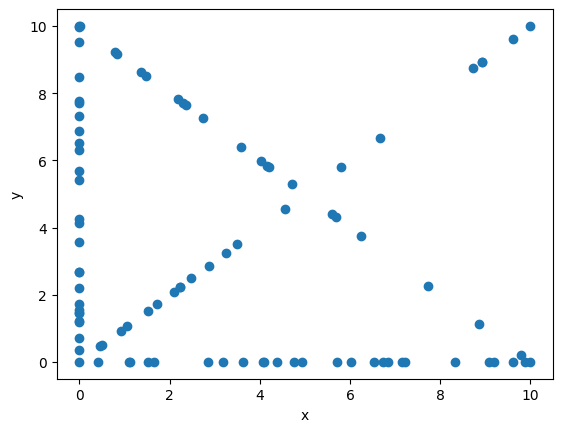

In [131]:
# visualize(points_d)
vis.clear()
vis.add_point(points_d)
vis.show()

## Algorytm Grahama oraz algorytm Jarvisa

Po przygotowaniu przykładowych zbiorów danych i ich zwizualizowaniu, chcemy zobaczyć jak buduje się dla nich otoczka wypukła z wykorzystaniem różnych algortymów.  
W tych dwóch algorytmach potrzebna będzie funkcja którą już dobrze znamy, czyli funkcja, która sprawdza po której stornie prostej znajduje się punkt.  
Dla każdego algorytmu trzeba będzie zaimplementować dwie funkcje obliczające otoczkę wypukłę, ze względu, że jedna z nich będzie miała możliwość wyświetlania kroków postępowania w algorytmie. Druga funkcja będzie uzyteczna do porównywania czasów dla różnych zbiorów danych i względęm algorytmów.  
W graficznej funkcji danego algorytmu, jednym kolorem powinny być zaznaczone wszystkie punkty zbioru wyjściowego, drugim kolorem boki aktualne rozpatrywane, a trzecim boki wielokąta otoczki. Po zakończeniu wyznaczania otoczki, wierzchołki otoczki powinny być wyróżnione (osobnym kolorem bądź kształtem).  

### Algorytm Grahama

Algorytm Grahama tworzy otoczkę wypukłą poprzez utrzymywanie stosu $S$, w którym znajdują się punkty, które mogą, ale nie muszą tworzyć otoczki wypukłej. Za każdym razem jest wstawiany na stos (push) jeden punkt z zbioru punktów $Q$ i jest on usuwany ze stosu (pop), jeżeli nie jest punktem $\mathcal{CH}(Q)$. Kiedy algorytm kończy się, stos $S$ zawiera tylko punkty otoczki wypukłej $\mathcal{CH}(Q)$ w kierunku przeciwnym do ruchu wskazówek zegera.

---

Procedura $\mathtt{Graham-Build(Q)}$ przyjmuje zbiór punktów $Q$, gdzie $|Q| \geq 3$. Wywołuje ona funkcję $\mathtt{TOP(S)}$, która zwraca punkt z góry stosu bez zmieniania $S$ oraz
$\mathtt{NEXT-TO-TOP(S)}$, która zwraca punkt ponieżej góry stosu $S$, bez zmieniania stosu. Funkcja $\mathtt{PUSH(p, S)}$ wstawia punkt $p$ na stos $S$. Funkcja $\mathtt{POP(p, S)}$ usuwa punkt $p$ ze stosu $S$.

$\mathtt{Graham-Build(Q)}$  
1)  niech $p_0$ będzie punktem w zbiorze Q z najmniejszą współrzędną $y$,  
    oraz najmniejszą współrzędną $x$ w przypadku, gdy wiele punktów ma tą samą współrzędną $x$  
    
2)  nich $\mathtt{\langle p_1, p_2, \dots, p_m \rangle}$ będzie pozostałym zbiorem punktów w $Q$ posortowanym  
    zgodnie z przeciwnym ruchem wskazówek zegara wokół punktu $p_0$  
    (jeżeli więcej niż jeden punkt ma ten sam kąt to usuwamy wszystkie punkty  
     z wyjątkiem tego najbardziej oddalonego od $p_0$)  
3) stwórz pusty stos $S$  
4) $\mathtt{PUSH(p_0, S)}$
5) $\mathtt{PUSH(p_1, S)}$
6) $\mathtt{PUSH(p_2, S)}$
7) **for** $i = 3$ **to** m  
8) &emsp;**while** kąt utworzony przez $\mathtt{NEXT-TO-TOP(S)}$, $\mathtt{TOP(S)}$ oraz $p_i$ tworzy lewostronny skręt
9) &emsp;&emsp;$\mathtt{POP(S)}$
10) &emsp;$\mathtt{PUSH(p_i, S)}$
11) **return** $S$


---

Lewostronny skręt oznacza, że dla trzech kolejnych punktów $a, b, c$, punkt $b$ leży po lewej stronie prostej $ac$.  
  



Implementacja algorytmu Grahama  

In [110]:
def graham_algorithm(Q):
    '''
    Funkcja buduje otoczkę wypukłą dla podanego zbioru punktów Q algorytmem Grahama
    :param Q: zbiór punktów
    :return: tablica punktów tworzących otoczkę wypukłą w postaci krotek współrzędnych
    '''
    n=len(Q)
    # wyznacznik macierzy 
    def mat_det_3x3(a, b, c): return a[0]*c[1]+a[1]*b[0]+c[0]*b[1]-c[1]*b[0]-a[0]*b[1]-a[1]*c[0]
    
    # punkty referencyjny, o min y, (x)
    min_point = Q[0]
    min_point = min(Q, key=lambda p: (p[1], p[0])) 
    
    #Obliczanie kątów i odległości od punktów
    A=[(0,0,min_point[0],min_point[1])]
    for i in range(n):
        if Q[i]==min_point: continue
        dx = Q[i][0] - min_point[0]
        dy = Q[i][1] - min_point[1]
        kąt = numpy.arctan2(dy,dx) # liczymy kąt  
        A.append((kąt,(dx**2 + dy**2)**0.5,Q[i][0],Q[i][1]))
    A = sorted(A, key = lambda x:(x[0],x[1])) # sortujemy po kącie
    
    #Usuwamy punkty o tym samym kącie (wspóliniowe)
    B=[(A[0][2],A[0][3])]
    for i in range(2,n):
        if A[i][0]!=A[i-1][0]:B.append((A[i-1][2],A[i-1][3])) # sprawdzamy czy sie nie powtórzyly
    if n!=1: B.append((A[n-1][2],A[n-1][3]))
    
    n=len(B) # nowa dlugosc tablicy po usunieciu 
    
    S=[]
    for i in range(min(n,3)):S.append(B[i]) # tworzymy stos

    for i in range(3,n):
        while len(S)>2 and mat_det_3x3(S[-2],S[-1],B[i])>-10**(-24): S.pop() #dopóki tworzy lewo strony kąt 
        S.append(B[i])
    return S
    #return len(S),S

In [ ]:
graham_algorithm(points_a)

In [ ]:
graham_algorithm(points_b)

In [ ]:
graham_algorithm(points_c)

In [ ]:
graham_algorithm(points_d)

In [ ]:
Test().runtest(1, graham_algorithm) # Testy wskazują poprawne działanie algorytmu

Implementacja wizualizacji algorytmu Grahama  

In [112]:
def graham_algorithm_draw(Q):
    '''
    Funkcja buduje otoczkę wypukłą dla podanego zbioru punktów Q algorytmem Grahama oraz pokazuje poszczególne kroki algorytmu
    :param Q: zbiór punktów
    :return: krotka w postaci (tablica punktów w postaci krotek współrzędnych, wizualizer pokazujący kroki algorytmu) 
    '''
    n=len(Q)
    # wyznacznik macierzy 
    def mat_det_3x3(a, b, c): return a[0]*c[1]+a[1]*b[0]+c[0]*b[1]-c[1]*b[0]-a[0]*b[1]-a[1]*c[0]
    
    # punkty referencyjny, o min y, (x)
    min_point = min(Q, key=lambda p: (p[1], p[0])) 
    
    #Obliczanie kątów i odległości od punktów
    A=[(0,0,min_point[0],min_point[1])]
    for i in range(n):
        if Q[i]==min_point: continue
        dx = Q[i][0] - min_point[0]
        dy = Q[i][1] - min_point[1]
        kąt = numpy.arctan2(dy,dx) # liczymy kąt  
        A.append((kąt,(dx**2 + dy**2)**0.5,Q[i][0],Q[i][1]))
    A = sorted(A, key = lambda x:(x[0],x[1])) # sortujemy po kącie
    
    #Usuwamy powtarzajce się punkty
    B=[(A[0][2],A[0][3])]
    for i in range(2,n):
        if A[i][0]!=A[i-1][0]:B.append((A[i-1][2],A[i-1][3])) # sprawdzamy czy sie nie powtórzyly
    if n!=1: B.append((A[n-1][2],A[n-1][3]))
    
    n=len(B) # nowa dlugosc tablicy po usunieciu powtorzeń
    
    # dodawanie do wizualizacji w trakcie dzialnia algorytmu
    S=[]
    edges=[]
    vis=Visualizer()
    vis.add_point(Q)
    for i in range(min(n,3)):
        S.append(B[i])
        vis.add_point(S[-1],color="green") 
    for i in range(min(n-1,2)):
        ls=vis.add_line_segment([S[i],S[i+1]],color="yellow")
        edges.append(ls)
    for i in range(3,n):
        while len(S)>2 and mat_det_3x3(S[-2],S[-1],B[i])>-10**(-12):
            vis.remove_figure(edges[-1])
            vis.add_point(S[-1],color="red")
            S.pop()
            edges.pop()
        S.append(B[i])
        vis.add_point(S[-1],color="green")
        ls=vis.add_line_segment([S[-2],S[-1]],color="yellow")
        edges.append(ls) 
    vis.add_line_segment([S[-1],S[0]],color="yellow")
    return S,vis

Zbiór danych A

In [27]:
graham_points_a, vis_graham_a = graham_algorithm_draw(points_a)

In [ ]:
#vis_graham_a.show_gif() # wizualizacja gifa w notebook'u
#vis_graham_a.save_gif("grahamA") # zapisywanie gifa jako "grahamA.gif"

In [ ]:
# visualize(graham_points_a)
vis.clear()
vis.add_point(points_a)
vis.add_line_segment([(graham_points_a[i], graham_points_a[i+1]) for i in range(len(graham_points_a)-1)],color="red")
vis.add_point([graham_points_a[i] for i in range (len(graham_points_a))],color = "red")
vis.add_line_segment([graham_points_a[-1], graham_points_a[0]],color="red")
vis.show()

Zbiór danych B

In [30]:
graham_points_b, vis_graham_b = graham_algorithm_draw(points_b)

In [98]:
#vis_graham_b.show_gif()# wizualizacja gifa w notebook'u
#vis_graham_b.save_gif("grahamB")# zapisywanie gifa jako "grahamB.gif"

In [ ]:
# visualize(graham_points_b)
vis.clear()
vis.add_point(points_b)
vis.add_line_segment([(graham_points_b[i], graham_points_b[i+1]) for i in range(len(graham_points_b)-1)],color="red")
vis.add_point([graham_points_b[i] for i in range (len(graham_points_b))],color = "red")
vis.add_line_segment([graham_points_b[-1], graham_points_b[0]],color="red")
vis.show()

Zbiór danych C

In [33]:
graham_points_c, vis_graham_c = graham_algorithm_draw(points_c)

In [99]:
#vis_graham_c.show_gif()# wizualizacja gifa w notebook'u
#vis_graham_c.save_gif("grahamC")## zapisywanie gifa jako "grahamC.gif"

In [ ]:
# visualize(graham_points_c)
vis.clear()
vis.add_point(points_c)
vis.add_line_segment([(graham_points_c[i], graham_points_c[i+1]) for i in range(len(graham_points_c)-1)],color="red")
vis.add_point([graham_points_c[i] for i in range (len(graham_points_c))],color = "red")
vis.add_line_segment([graham_points_c[-1], graham_points_c[0]],color="red")
vis.show()

Zbiór danych D

In [134]:
graham_points_d, vis_graham_d = graham_algorithm_draw(points_d)

In [136]:
#vis_graham_d.show_gif()# wizualizacja gifa w notebook'u
vis_graham_d.save_gif("grahamD")# zapisywanie gifa jako "grahamD.gif"

In [ ]:
# visualize(graham_points_d)
vis.clear()
vis.add_point(points_d)
vis.add_line_segment([(graham_points_d[i], graham_points_d[i+1]) for i in range(len(graham_points_d)-1)],color="red")
vis.add_point([graham_points_d[i] for i in range (len(graham_points_d))],color = "red")
vis.add_line_segment([graham_points_d[-1], graham_points_d[0]],color="red")
vis.show()

### Algorytm Jarvisa

Algorytm Jarvisa oblicza otoczkę wypukłą dla zbioru punktów $Q$ przez technikę zwaną owijaniem paczki (*package wrapping*) lub owijaniem prezentu (*gift wrapping*). Algorytm Jarvisa buduje sekwencję $H = \langle p_1, p_2, \dots, p_m \rangle$ będącą wierzchołkami $\mathcal{CH}(Q)$. Zaczynamy od punktu $p_0$, następny punkt $p_1$ w otoczce wypukłej ma najmniejszy kąt w odniesieniu do $p_0$ (w przypadku takiego samego kąta - wybiera się punkt najdalej od $p_0$). Podobnie, gdy $p_2$ ma najmniejszy kąt w odniesieniu do $p_1$, itd.. Zauważyć warto, że możemy tym sposobem obliczyć lewy i prawy łańcuch otoczki wypukłej $\mathcal{CH}(Q)$. Lewy łańcuch buduje się podobnie. Gdy osiągniemy najwyższy wierzchołej w prawym łańcuchu $p_k$, wybieramy wierzchołek $p_{k+1}$, który ma najmniejszy kąt w odniesieniu do $p_k$, ale od ujemnej osi-$x$. Można zaimplementować algorytm Jarvisa bez konstruowania pomocniczych łańcuchów - lewego i prawego. Taka implementacja utrzymuje śledzenie kąta ostatniej strony otoczki wypukłej i wymaga sekwencji kątów boków otoczki tylko rosnącej. (Patrząc na trzy ostatnie punkty jesteśmy w stanie obliczyć jaki punkt należy włączyć do $\mathcal{CH}(Q)$ w zależności od budowanego punktu)

In [13]:
def jarvis_algorithm(Q):
    '''
    Funkcja buduje otoczkę wypukłą dla podanego
    zbioru punktów Q algorytmem Jarvisa.
    :param Q: lista punktów (krotek współrzędnych)
    :return: lista punktów należących do otoczki wypukłej
    '''
    #Funckja pomocniczna do liczenia położenia
    def det(a, b, c):return (b[0] - a[0]) * (c[1] - a[1]) - (b[1] - a[1]) * (c[0] - a[0])

    # Funkcja do sprawdzenia polozenia punktu wgl prostej
    def orient(a, b, c):
        return 1 if det(a, b, c) < 0 else -1 if det(a, b, c) > 0 else 0
    
    if len(Q) <= 3: return Q # dla malej ilosci punktow

    start = min(Q, key=lambda p: (p[1], p[0])) # sortowanie po y, (x)
    otoczka = [] # sekwencja H
    ostatni_pkt = start
        

    while True: # dopóki nie dojdziemy do początkowego punktu
        otoczka.append(ostatni_pkt)
        potencjlany_pkt = Q[0]
        for i in range(len(Q)):
             orientacja = orient(ostatni_pkt, Q[i], potencjlany_pkt) # jesli jest po lewej stronie lub na lini ale bardzie oddalony to jest kandydatem
             if (orientacja == -1) or orientacja == 0 and \
                (ostatni_pkt[0] - Q[i][0])**2 + (ostatni_pkt[1] - Q[i][1])**2 > \
                (ostatni_pkt[0] - potencjlany_pkt[0])**2 + (ostatni_pkt[1] - potencjlany_pkt[1])**2: 
                potencjlany_pkt = Q[i]
        ostatni_pkt = potencjlany_pkt
        
        if ostatni_pkt == start: break
            
    return otoczka 
    #return len(otoczka),otoczka 

In [ ]:
jarvis_algorithm(points_a)

In [ ]:
jarvis_algorithm(points_b)

In [ ]:
jarvis_algorithm(points_c)

In [ ]:
jarvis_algorithm(points_d)

In [ ]:
Test().runtest(2, jarvis_algorithm) # Testy wskazują poprawne działanie algorytmu

In [19]:
def jarvis_algorithm_draw(Q):
    '''
    Funkcja buduje otoczkę wypukłą dla podanego
    zbioru punktów Q algorytmem Jarvisa i wizualizuje kroki.
    :param Q: lista punktów (krotek współrzędnych)
    :return: lista punktów należących do otoczki wypukłej i obiekt wizualizera
    '''

    #Funckja pomocniczna do liczenia położenia
    def det(a, b, c):
        return (b[0] - a[0]) * (c[1] - a[1]) - (b[1] - a[1]) * (c[0] - a[0])

    # Funkcja do sprawdzenia polozenia punktu wgl prostej
    def orient(a, b, c):
        return 1 if det(a, b, c) < 0 else -1 if det(a, b, c) > 0 else 0

    if len(Q) <= 3:
        return Q

    start = min(Q, key=lambda p: (p[1], p[0]))  # sortowanie po y, (x)
    otoczka = [start]  
    ostatni_pkt = start

    # Inicjalizacja wizualizatora
    vis = Visualizer()
    vis.add_point(Q)  
    vis.add_point(start, color="red")  

    # Dodawanie do wizualizacji + algorytm Jarvisa
    while True:
        potencjalny_pkt = Q[0]
        
        for i in range(len(Q)):
            if Q[i] == ostatni_pkt:
                continue
            
        for i in range(len(Q)):
             orientacja = orient(ostatni_pkt, Q[i], potencjalny_pkt)
             if (orientacja == -1) or orientacja == 0 and \
                (ostatni_pkt[0] - Q[i][0])**2 + (ostatni_pkt[1] - Q[i][1])**2 > \
                (ostatni_pkt[0] - potencjalny_pkt[0])**2 + (ostatni_pkt[1] - potencjalny_pkt[1])**2: 
                potencjalny_pkt = Q[i]
        
        vis.add_point(potencjalny_pkt, color="yellow")
        vis.add_line_segment([ostatni_pkt, potencjalny_pkt], color="yellow")

        if potencjalny_pkt == start:
            break

        otoczka.append(potencjalny_pkt)
        vis.add_point(potencjalny_pkt, color="green")
        vis.add_line_segment([ostatni_pkt, potencjalny_pkt], color="yellow")

        ostatni_pkt = potencjalny_pkt

    vis.add_line_segment([otoczka[-1], start], color="yellow")

    return otoczka, vis



Zwizualizuj swoją implementację algorytmu.

Zbiór danych A

In [20]:
jarvis_points_a, vis_jarvis_a = jarvis_algorithm_draw(points_a)

In [ ]:
#vis_jarvis_a.show_gif() # wizualizacja gifa w notebook'u 
#vis_jarvis_a.save_gif("JarvisA")# zapisywanie gifa jako "JarvisA.gif"

In [ ]:
# visualize(jarvis_points_a)
vis.clear()
vis.add_point(points_a)
vis.add_line_segment([(jarvis_points_a[i], jarvis_points_a[i+1]) for i in range(len(jarvis_points_a)-1)],color="red")
vis.add_point([jarvis_points_a[i] for i in range (len(jarvis_points_a))],color = "red")
vis.add_line_segment([jarvis_points_a[-1], jarvis_points_a[0]],color="red")
vis.show()

Zbiór danych B

In [23]:
jarvis_points_b, vis_jarvis_b = jarvis_algorithm_draw(points_b)

In [24]:
#vis_jarvis_b.show_gif()# wizualizacja gifa w notebook'u 
#vis_jarvis_b.save_gif("JarvisB")# zapisywanie gifa jako "JarvisB.gif"

In [ ]:
# visualize(jarvis_points_b)
vis.clear()
vis.add_point(points_b)
vis.add_line_segment([(jarvis_points_b[i], jarvis_points_b[i+1]) for i in range(len(jarvis_points_b)-1)],color="red")
vis.add_point([jarvis_points_b[i] for i in range (len(jarvis_points_b))],color = "red")
vis.add_line_segment([jarvis_points_b[-1], jarvis_points_b[0]],color="red")
vis.show()

Zbiór danych C

In [26]:
jarvis_points_c, vis_jarvis_c = jarvis_algorithm_draw(points_c)

In [27]:
#vis_jarvis_c.show_gif()# wizualizacja gifa w notebook'u 
#vis_jarvis_c.save_gif("JarvisC")# zapisywanie gifa jako "JarvisC.gif"

In [ ]:
# visualize(jarvis_points_c)
vis.clear()
vis.add_point(points_c)
vis.add_line_segment([(jarvis_points_c[i], jarvis_points_c[i+1]) for i in range(len(jarvis_points_c)-1)],color="red")
vis.add_point([jarvis_points_c[i] for i in range (len(jarvis_points_c))],color = "red")
vis.add_line_segment([jarvis_points_c[-1], jarvis_points_c[0]],color="red")
vis.show()

Zbiór danych D

In [28]:
jarvis_points_d, vis_jarvis_d = jarvis_algorithm_draw(points_d)

In [ ]:
#vis_jarvis_d.show_gif()# wizualizacja gifa w notebook'u 
#vis_jarvis_d.save_gif("JarvisD")# zapisywanie gifa jako "JarvisD.gif"

In [ ]:
# visualize(jarvis_points_d)
vis.clear()
vis.add_point(points_d)
vis.add_line_segment([(jarvis_points_d[i], jarvis_points_d[i+1]) for i in range(len(jarvis_points_d)-1)],color="red")
vis.add_point([jarvis_points_d[i] for i in range (len(jarvis_points_d))],color = "red")
vis.add_line_segment([jarvis_points_d[-1], jarvis_points_d[0]],color="red")
vis.show()

Przygotwane zbioru do porównania czasowego 


In [165]:
PunktyE = [100,1000,5000,10000,50000] # Zbiory testowep punktów ze zbiorów A, C, D
PunktyF = [10,100,500,1000,3000] # Zbior testowy dla punktów ze zbioru B
TestZbiorA = [generate_uniform_points(-1000,1000,liczba) for liczba in PunktyE]
TestZbiorB = [generate_circle_points((100,100), 500, liczba) for liczba in PunktyF]
TestZbiorC = [generate_rectangle_points((-200,50), (-200,-150), (100,-150), (100,50), liczba) for liczba in PunktyE]
TestZbiorD = [generate_square_points((0,0), (100,0), (100,100), (0,100), int(0.3*liczba)-1, int(0.2*liczba)-1) for liczba in PunktyE]

Porównianie wydajności czasowej

In [ ]:
from time import time
TestPunkty=[("Zbiór A",TestZbiorA), ("Zbiór B",TestZbiorB), ("Zbiór C",TestZbiorC), ("Zbiór D",TestZbiorD)]
for i in range (len(TestPunkty)):
    print(TestPunkty[i][0],":")
    for j in range(len(TestPunkty[i][1])):
        print("Liczba punktów:",len(TestPunkty[i][1][j]),"\nAlgorytm Grahama: ",end='')
        t0=time()
        graham_algorithm(TestPunkty[i][1][j])
        t1=time()
        print("czas wykonania {ex_time:.4f} s".format(ex_time=t1-t0))
        print("Algorytm Jarvisa: ",end='')
        t0=time()
        jarvis_algorithm(TestPunkty[i][1][j])
        t1=time()
        print("czas wykonania {ex_time:.4f} s\n".format(ex_time=t1-t0))

Bibliografia:
- Wprowadzenie do algorytmów wydanie 3, Thomas H. Cormen, Charles E. Leiserson, Ronald L. Rivest, Stein Clifford
